# Çift Yıldızlarda Radyal Hız Hesabi
Ödev olarak verilen belgelerde tablo verilerini excel'de yapılan işlemler:
+ V0 ilk hızının 8.7 olarak bulunmasi ve tabloya eklenmesi
+ Verilerin küçükten büyüğe hizalanması (sort edilmesi).

bu işlemi excel'de yapıldıktan sonra dosyayı '.csv' formatında dışarı aktardım.
Aktarımdan sonra python olarak devam edeceğiz.


In [1]:
# gerekli kutuphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
# csv dosyasini oku
file = pd.read_csv("data-rad-hiz.csv")
data = pd.DataFrame(file)
#data = data.sort_index(axis=0)
data.head()

,Evre,Vr
0,0.0007,7.2
1,0.0807,-39.3
2,0.0942,-41.4
3,0.1230,-58.9
4,0.1932,-81.0


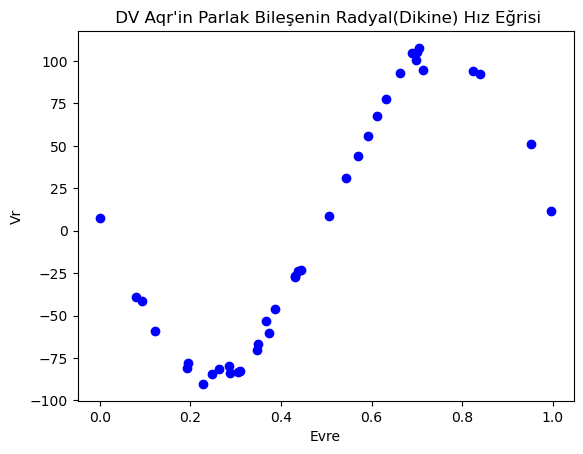

In [3]:
# veri sutunlarini numpy arrayine cevir ve gorsellestir
x = np.array(data["Evre"])
y = np.array(data["Vr"])
plt.plot(x,y,"bo")
plt.title(" DV Aqr'in Parlak Bileşenin Radyal(Dikine) Hız Eğrisi")
plt.ylabel("Vr")
plt.xlabel("Evre")
plt.show()

In [4]:
# ilk hiz hesabi
v0 = (y.min()+y.max())/2
print("v0: {:.2f}".format(v0))

v0: 8.70


In [5]:
# ilk hiz array'i (sutunu)
v0 = np.ones(len(x))*8.7

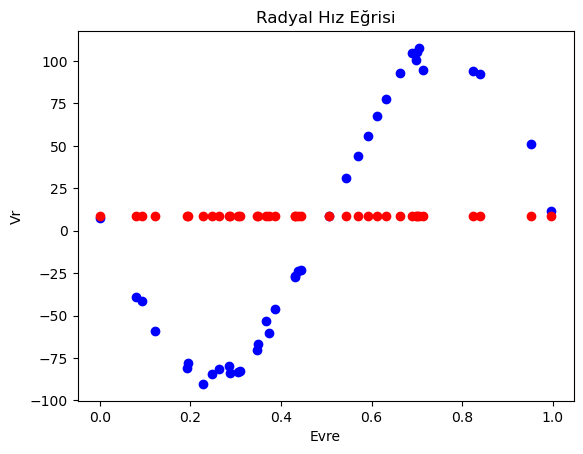

In [6]:
# ilk hiz sutunu gozlemsel veri ile ciz
plt.plot(x,y,"bo")
plt.plot(x,v0,"ro")
plt.title("Radyal Hız Eğrisi")
plt.ylabel("Vr")
plt.xlabel("Evre")
plt.show()

In [7]:
x.shape[0] # x evre arreyinde kac eleman var

38

In [8]:
alan = np.array([(abs(y[i]-v0[0])+abs(y[i+1]-v0[0]))*(x[i+1]-x[i])/2 
                 for i in range(0,36+1) ])
print(alan)

[1.98       0.662175   1.69488    5.52123    0.09702    3.19404
 1.80574    1.44728    2.00032    0.153935   1.614375   0.48495
 3.09946    0.177905   1.2925     0.36025    0.8184     1.964025
 0.053625   0.22048    0.196115   0.97020208 0.43702208 0.713
 0.9476     0.99981    1.334465   2.429805   2.370945   0.6573
 0.273325   0.46013    0.8695     9.47842    1.28668    7.08543
 0.989945  ]


In [9]:
# 0.1 evre 10 mm yani 1 evre = 100 mm
# 20 vr(km/sn) 10 mm yan 1 vr = 0.5 mm
evre_mm = np.array(np.float32(x*100))
vr_mm = np.array(y*0.5)
v0_mm = np.array(v0*0.5)
# yamuk alan (vr[0]-ev[0])+vr[1]+evre[1])*(evre[1]-evre[0])
alan_mm = np.array([(abs(vr_mm[i]-v0_mm[0])+
                     abs(vr_mm[i+1]-v0_mm[0]))
                    *abs(evre_mm[i+1]-evre_mm[i])/2 for i in range(0,36+1)])
print(evre_mm)
print(vr_mm)
print(v0_mm)
print(alan_mm)

[7.0000000e-02 8.0699997e+00 9.4200001e+00 1.2300000e+01 1.9320000e+01
 1.9430000e+01 2.2870001e+01 2.4750000e+01 2.6330000e+01 2.8570000e+01
 2.8740000e+01 3.0490000e+01 3.1020000e+01 3.4660000e+01 3.4889999e+01
 3.6770000e+01 3.7320000e+01 3.8639999e+01 4.2990002e+01 4.3139999e+01
 4.3779999e+01 4.4389999e+01 5.0530518e+01 5.4450001e+01 5.6930000e+01
 5.9230000e+01 6.1119999e+01 6.3209999e+01 6.6379997e+01 6.9010002e+01
 6.9709999e+01 7.0000000e+01 7.0470001e+01 7.1410004e+01 8.2470001e+01
 8.3989998e+01 9.5209999e+01 9.9599998e+01]
[  3.6  -19.65 -20.7  -29.45 -40.5  -39.   -45.15 -42.2  -40.7  -39.9
 -41.95 -41.6  -41.2  -35.25 -33.4  -26.65 -30.15 -23.15 -13.3  -13.75
 -12.   -11.45   4.35  15.5   21.95  27.95  33.65  38.9   46.45  52.4
  50.2   52.75  53.85  47.35  47.05  46.3   25.55   5.7 ]
[4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35
 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35
 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.35 4.

In [10]:
len(evre_mm)
evre_mm[0]

0.07

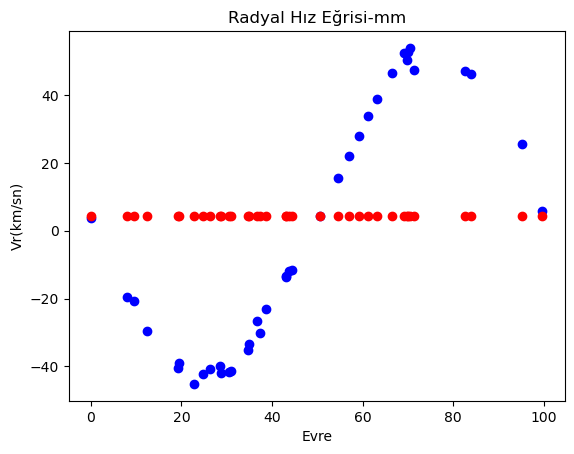

In [11]:
plt.plot(evre_mm,vr_mm,"bo")
plt.plot(evre_mm,v0_mm,"ro")
plt.title("Radyal Hız Eğrisi-mm")
plt.ylabel("Vr(km/sn)")
plt.xlabel("Evre")
plt.show()

In [12]:
#alanlari hesaplamak icin orta noktanın (v0 = 8.7) indexini bulalım
a= np.where(y == 8.7)[0][0]
print(a)

22


In [13]:
# bu indexe göre alanları (egrinin altinda kalan, üstünde kalan) hesaplayalım
alt_alan = alan_mm[:23].sum() # alt kisimda kalan alan
ust_alan = alan_mm[23:].sum() # ust kisimda kalan alan
print("""Eğrinin (kırmızı noktaların) altında kalan alan : 
{:.2f} \nEğrinin (kırmızı noktaların) üzerinde kalan alan : {:.2f}"""
      .format(alt_alan,ust_alan))

Eğrinin (kırmızı noktaların) altında kalan alan : 
1512.30 
Eğrinin (kırmızı noktaların) üzerinde kalan alan : 1494.82


Eğrinin üstünde kalan alan altında kalan alandan daha fazla. Bize verilen notlarda bu durumda çizdiğimiz doğruyu biraz daha yukarıya kaydırmalıyız $V_r = 10 km^{-1}$ den geçen doğrunun dikine hız eğrisini eşit iki alana ayırdığını görürüz. Demek ki bu çift yıldızın kütle merkezi gözlemciden $10 km^{-1}$ lik bir hızla uzaklaşmaktadır. $V_0 = + 10 km^{-1}$

In [14]:
# v0 degerini 10 km^-1 olarak degistirip grafikleri tekrar olusturalim
y_10 = y.copy()
#y_10[23] = 10 # 8.7 = 10 
vr_10mm = np.array(y_10*0.5) # vr 10 
V0_10 = np.ones(len(x))*10 
V0_10

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

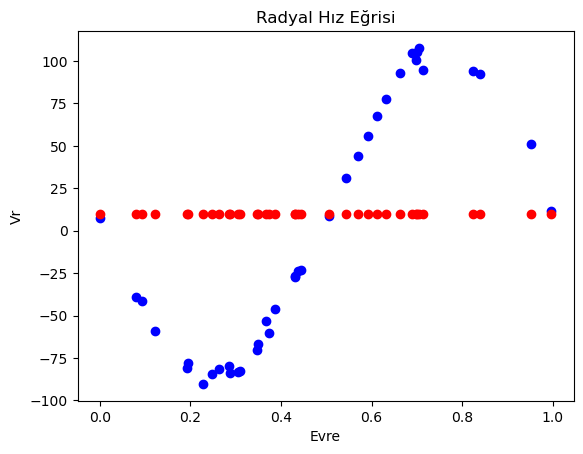

In [15]:
plt.plot(x,y_10,"bo")
plt.plot(x,V0_10,"ro")
plt.title("Radyal Hız Eğrisi")
plt.ylabel("Vr")
plt.xlabel("Evre")
plt.show()

In [16]:
# v0 = 10 icin tekrar alan hesabi, gercekten iki es parcaya boluyor mu?
V0_10mm = np.array(V0_10*0.5)
# yamuk alan (vr[0]-ev[0])+vr[1]+evre[1])*(evre[1]-evre[0])
alan_10mm = np.array([(abs(vr_10mm[i]-V0_10mm[0])+abs(vr_10mm[i+1]-V0_10mm[0]))
                      *abs(evre_mm[i+1]-evre_mm[i])/2 for i in range(0,36)])
print(V0_10mm)
print(alan_10mm)

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[104.19999379  33.9862596   86.61600344 280.62448018   4.92252731
 161.93802514  91.50895915  73.39099646 101.47198963   7.8072535
  81.85625     24.59203186 157.33897362   9.044732    65.84703741
  18.36997452  41.77799034 101.02880316   2.7787076   11.43998909
  10.20226021  52.50143051  21.85111876  34.03799372  45.88498478
  48.76198425  65.36475477 119.42968102 116.83796692  32.4098587
  13.47779255  22.70105896  42.86411133 466.73189697  63.3458601
 346.97853775]


In [17]:
# alanlari hesaplamak icin orta noktanın (v0 = 10) indexini bulalım
#a = np.where(y_10 == 10)[0][0]
#print(a)

In [18]:
# bu indexe göre alanları (egrinin altinda kalan, üstünde kalan) hesaplayalım
alt_alan10 = alan_10mm[:23].sum() # alt kisimda kalan alan
ust_alan10 = alan_10mm[23:].sum() # ust kisimda kalan alan
print("""Eğrinin (kırmızı noktaların) altında kalan alan : {:.2f} 
\nEğrinin (kırmızı noktaların) üzerinde kalan alan : {:.2f}""".format(alt_alan,ust_alan))

Eğrinin (kırmızı noktaların) altında kalan alan : 1512.30 

Eğrinin (kırmızı noktaların) üzerinde kalan alan : 1494.82


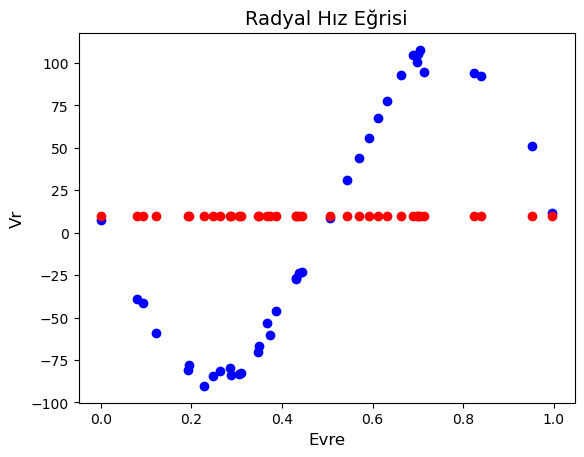

In [19]:
plt.plot(x,y_10,"bo")
plt.plot(x,V0_10,"ro")
plt.title("Radyal Hız Eğrisi",fontsize=14)
plt.ylabel("Vr",fontsize=12)
plt.xlabel("Evre",fontsize=12)
plt.show()

In [20]:
#opt.curve_fit?

In [21]:
y_10

array([  7.2, -39.3, -41.4, -58.9, -81. , -78. , -90.3, -84.4, -81.4,
       -79.8, -83.9, -83.2, -82.4, -70.5, -66.8, -53.3, -60.3, -46.3,
       -26.6, -27.5, -24. , -22.9,   8.7,  31. ,  43.9,  55.9,  67.3,
        77.8,  92.9, 104.8, 100.4, 105.5, 107.7,  94.7,  94.1,  92.6,
        51.1,  11.4])

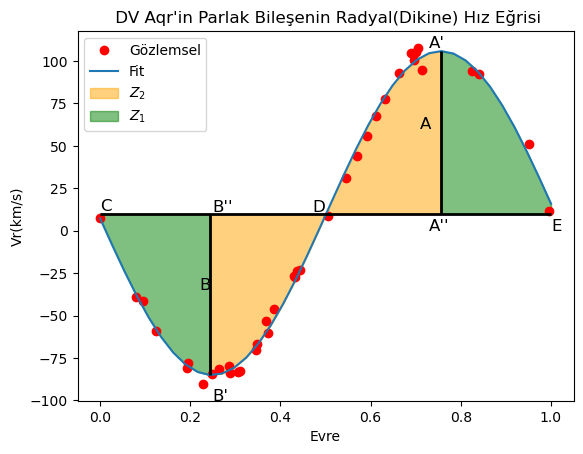

In [22]:
# Sin fonksiyonu fit etme ve kitaptaki grafigi elde etme

x = x
y = y_10
# Sin fonksiyonu tanımlama
def sin_func(x, a, b, c, d):
    return a * np.sin((b * x) - c) - d

# Veriye en uygun parametreleri bulma
params = opt.curve_fit(sin_func, x, y_10)[0]

# Veri noktalarını çizdirme
plt.plot(x, y,"ro",label="Gözlemsel")

# Fit edilen sin fonksiyonunu çizdirme
x_fit = np.linspace(0,1 , 38)
y_fit = sin_func(x_fit, *params)
plt.plot(x_fit, y_fit,label="Fit")

# grafik basligi ve eksenler
plt.title(" DV Aqr'in Parlak Bileşenin Radyal(Dikine) Hız Eğrisi")
plt.ylabel("Vr(km/s)")
plt.xlabel("Evre")



# Y eksenine göre yatay çizgi çizdirme
plt.hlines(y=10, xmin=0, xmax=1, color='black', linewidth=2)


# Y eksenine göre dikey çizgiler ve noktalari çizdirme
plt.text(x=0, y=12, s="C", color='black', fontsize=12) 
plt.vlines(x=x_fit[np.where(y_fit==y_fit.min())[0][0]], 
           ymin=y_fit.min(), ymax=10, color='black', linewidth=2)
plt.text(x=0.22, y=-35, s='B', color='black', fontsize=12)
plt.text(x=0.25, y=11, s="B''", color='black', fontsize=12)
plt.text(x=0.25, y=-100, s="B'", color='black', fontsize=12)

plt.text(x=0.47, y=11, s="D", color='black', fontsize=12)

plt.text(x=1, y=0, s="E", color='black', fontsize=12)
plt.vlines(x=x_fit[np.where(y_fit==y_fit.max())[0][0]], 
           ymin=y_fit.max(), ymax=10, color='black', linewidth=2)
plt.text(x=0.73, y=108, s="A'", color='black', fontsize=12)
plt.text(x=0.71, y=60, s='A', color='black', fontsize=12)
plt.text(x=0.73, y=0, s="A''", color='black', fontsize=12)

# z1 ve z2 alanlari
plt.fill_between(x_fit[np.where(y_fit==y_fit.min())[0][0]:
                       np.where(y_fit==y_fit.max())[0][0]+1],
                 y_fit[np.where(y_fit==y_fit.min())[0][0]:
                       np.where(y_fit==y_fit.max())[0][0]+1],
                 V0_10[np.where(y_fit==y_fit.min())[0][0]:
                       np.where(y_fit==y_fit.max())[0][0]+1],
                 color='orange', alpha=0.5, label=r'$Z_2$')

plt.fill_between(x_fit[np.where(y_fit==y_fit.max())[0][0]:], 
                 y_fit[np.where(y_fit==y_fit.max())[0][0]:], 
                 V0_10[np.where(y_fit==y_fit.max())[0][0]:], 
                 color='green', alpha=0.5, label=r'$Z_1$')

plt.fill_between(x_fit[:np.where(y_fit==y_fit.min())[0][0]+1], 
                 y_fit[:np.where(y_fit==y_fit.min())[0][0]+1], 
                 V0_10[:np.where(y_fit==y_fit.min())[0][0]+1], 
                 color='green', alpha=0.5)

# hangi egri oldugunu goster
plt.legend()
# Grafiği gösterme
plt.show()

In [23]:
y_fit.max()

105.82073041644819

In [24]:
# fit edilmiş degerler üzerinden alan
#alan_mm = np.array([(abs(y_fit[i]-v0_mm[0])+abs(y_fit[i+1]-v0_mm[0]))
#*(evre_mm[i+1]-evre_mm[i])/2 for i in range(0,39) ])

In [25]:
# A =  A' - A''
A = np.ceil(y_fit.max()-10) # A'yi hesapla ve tam yuvarla
print("A : ",A)

A :  96.0


In [26]:
B = abs(np.ceil(y_fit.min()-10)) # B'yi hesapla tam yuvarla ve mutlak olarak al.
print("B : ",B)

B :  95.0


In [27]:
# e*cos(omega) = (A-B)/(A+B)
ecosw = (A-B)/(A+B)
print(ecosw)
ecosw = np.round(ecosw,decimals=7)
print("ecosw : ",ecosw)

0.005235602094240838
ecosw :  0.0052356


In [28]:
# e*sin(omega) hesabi icin Z1 
z1_1 = alan_mm[y.argmax()-1:].sum()
print("Z1_2 = ",z1_1)
z1_2 = alan_mm[:y.argmin()-1].sum()
print("Z1_2 = ",z1_2)
z1  = (z1_1+z1_2)/2
print("Z1 = ",z1)

Z1_2 =  1008.5052076339721
Z1_2 =  497.765264236927
Z1 =  753.1352359354496


In [29]:
# e*sin(omega) hesabi icin Z2
z2_1 = alan_mm[y.argmin()-1:np.where(y==8.7)[0][0]].sum()
print("Z2_1 = ",z2_1)
z2_2 = alan_mm[np.where(y==8.7)[0][0]+1:y.argmax()].sum()
print("Z2_2 = ",z2_2)
z2 = (z2_1+z2_2)/2
print("Z2 = ",z2)

Z2_1 =  992.6800679683686
Z2_2 =  509.3190759658813
Z2 =  750.9995719671249


In [30]:
# z1 ve z2 degerlerinin yuvarlanması
z1 = np.ceil(z1)
z2 = np.ceil(z2)

In [31]:
# e*sin(omega) =  2*sqrt(A*B)/(A+B) (z2-z1)/(z2+z1)
esinw = (2*np.sqrt(A*B)/(A+B))*(z2-z1)/(z2+z1)
print("esinw = ",esinw)

esinw =  -0.0019933281610792627


In [32]:
gercek =  -0.001996
olculen = esinw
hata = (gercek-olculen)/gercek
yuzhata = hata * 100
print("% gercek hata: ",yuzhata)

% gercek hata:  0.13385966536759664


In [33]:
# tan w = sin w / cos w
tanw = esinw/ecosw # omegayi hesaplamak icin e'ler sadelesir tanw kalir
tanw

-0.3807258310564716

In [34]:
w = np.arctan(tanw) # arctan
w

-0.3637811029786076

In [35]:
np.degrees(w) # omega derece olarak

-20.843121867288197

In [36]:
# ecosw degerinden e yi hesaplayalım
cosw = np.cos(w) # cosw hesapla
e = ecosw/cosw   # e yi hesapla
e

0.005602219606348152

Saat yönünün tersine -20.8 , saat yönünde ise 339.2 olur.

Yukarıda hesaplamış olduğumuz veriler:

$e \ \cos \omega = 0.0052356$

$e \ \sin \omega = -0.001993$

$\dfrac{e \sin \omega}{e \cos \omega} = \dfrac{-0.001993}{0.0052356}$

$\tan \omega = -0.3807258310564716 $

$\omega = \arctan (-0.3807258310564716) = - 20.8 = 339.2 $ derece olarak bulunur.

$e * \cos \omega = 0.0052356 => e = \dfrac{0.0052356}{\cos \omega} = 0.0056$ olarak bulunur.

<img src="anlayamadim.jpeg" alt="image">

e ve $\omega$ dan sonrasını nasıl yaptığımızı anlayamadım o değerleri nasıl bulduk tam anlayamadım? Derste bu kısmı sorarım nasıl grafikten elde ederiz diye.

# Kaynaklar
[Python verileri ve algoritmalar](https://github.com/ebupi/ast428-cift-yildizlar) hocam linke tıklayıp github sayfama gider kaynakları buraya yukledim.

[Python hesaplamalar]().